In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### Прямой поиск одного изображения на другом (template matching)

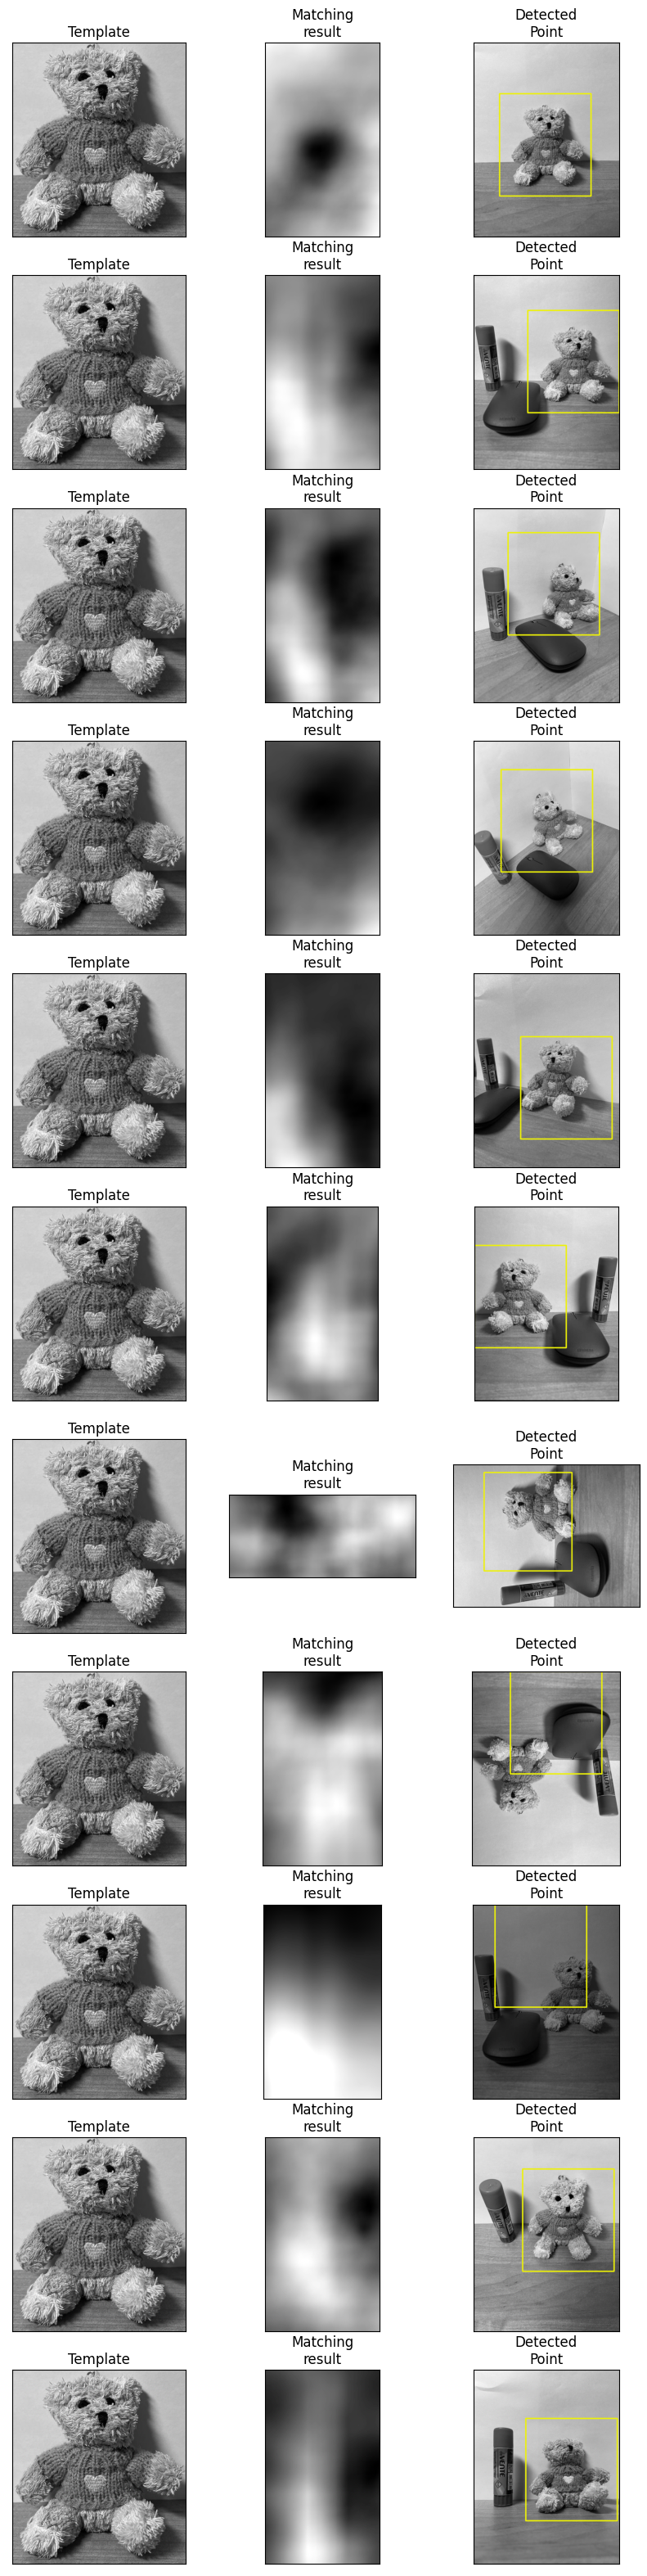

In [10]:
img = [] # массив исходных изображений + эталон (итого 12 изображений)
img.append(cv.cvtColor(cv.imread("../Lab2/data/template.jpg", 0), cv.COLOR_BGR2RGB))
for i in range(1,12):
    img.append(cv.cvtColor(cv.imread("../Lab2/data/img_" + str(i) + ".jpg", 0), cv.COLOR_BGR2RGB))

# реализация template matching путём перебора всех изображений и поиска эталонного изображения на другом
output = [] # массив для выходных данных
for i in range(1,len(img)):
    # template Matching
    res = cv.matchTemplate(img[i], img[0], cv.TM_SQDIFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # Если метод TM_SQDIFF (или TM_SQDIFF_NORMED), берём минимум, иначе - максимум 
    top_left = min_loc
    bottom_right = (top_left[0] + img[0].shape[1], top_left[1] + img[0].shape[0])
    img_result = img[i].copy()
    cv.rectangle(img_result, top_left, bottom_right, (238, 242, 7), 7)
    output.append([img[0], res, img_result])

# Вывод полученных данных
fig, axes = plt.subplots(nrows = 11, ncols = 3, figsize=(10,40))

for i in range(len(output)):
    for j in range(len(output[0])):
        if j == 0:
            axes[i,j].set(title='Template', xticks=[], yticks=[])
            axes[i,j].imshow(output[i][j])
        if j == 1:
            axes[i,j].set(title='Matching\nresult', xticks=[], yticks=[])
            axes[i,j].imshow(output[i][j], cmap='gray')
        if j == 2:
            axes[i,j].set(title='Detected\nPoint', xticks=[], yticks=[])
            axes[i,j].imshow(output[i][j])
            
plt.show()

### Поиск ключевых точек эталона на входном изображении (ORB)

In [11]:
def get_border_box(kpimg, matches):
#Получение рамки из результатов ORB 
    points = [kpimg[m.trainIdx].pt for m in matches]
    xs = [pt[0] for pt in points]
    ys = [pt[1] for pt in points]
    x0 = int(min(xs))
    y0 = int(min(ys))
    x1 = int(max(xs))
    y1 = int(max(ys))
    return (x0, y0), (x1, y1)

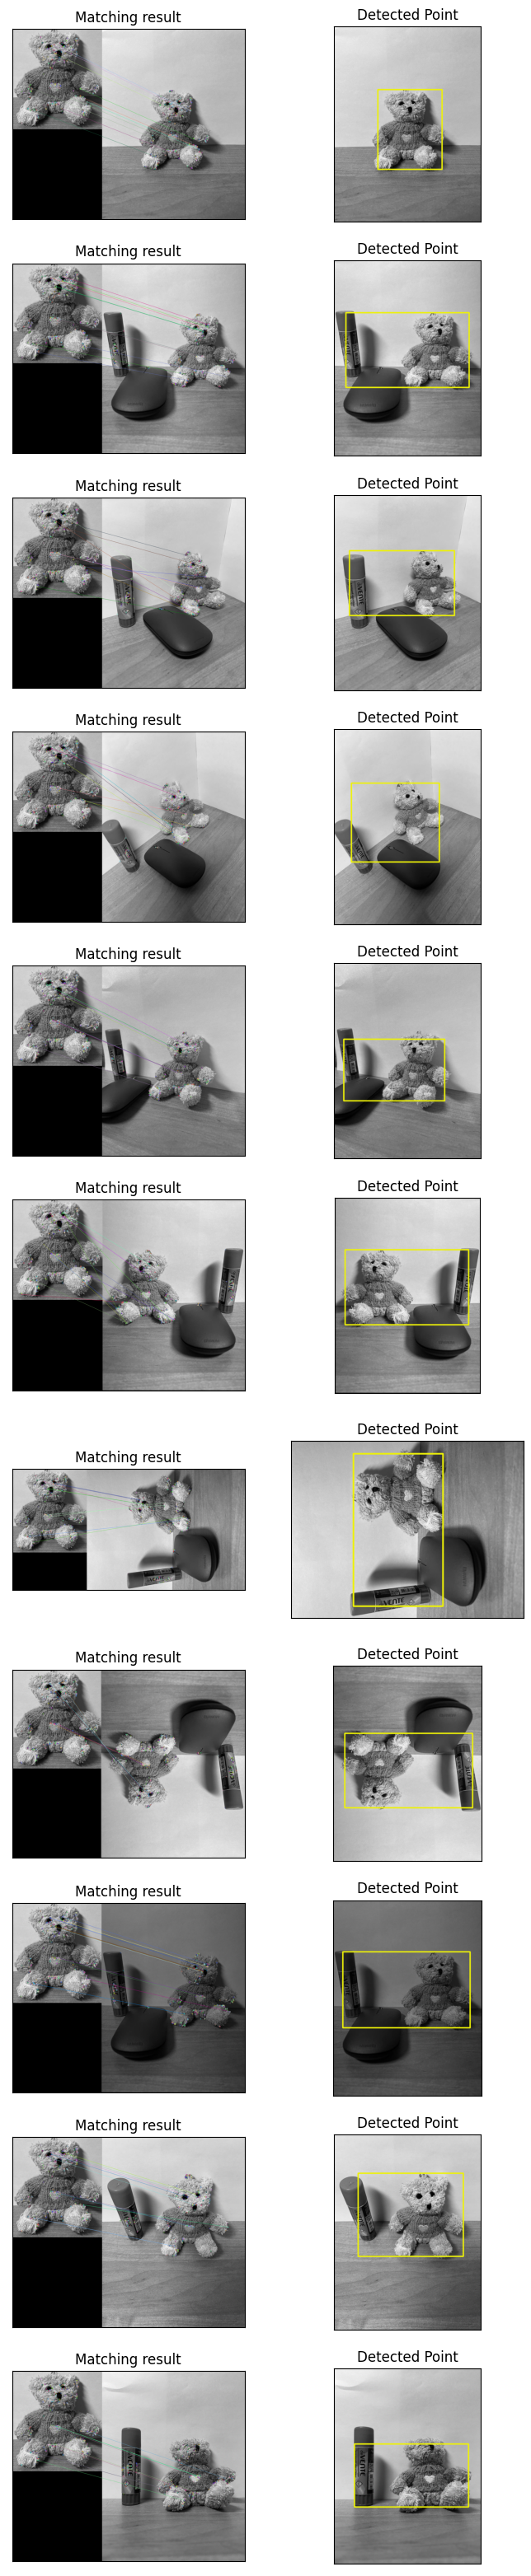

In [12]:
img = [] # массив исходных изображений + эталон (итого 12 изображений)
img.append(cv.cvtColor(cv.imread("../Lab2/data/template.jpg", 0), cv.COLOR_BGR2RGB))
for i in range(1,12):
    img.append(cv.cvtColor(cv.imread("../Lab2/data/img_" + str(i) + ".jpg", 0), cv.COLOR_BGR2RGB))

# реализация алгоритма ORB
output_ORB = [] # массив для выходных данных
for i in range(1,len(img)):
    # Инициализация ORB
    orb = cv.ORB_create()
    # Поиск ключевых точек и дескрипторов с помощью ORB
    kp_templ, des_templ = orb.detectAndCompute(img[0],None)
    kp_img, des_img = orb.detectAndCompute(img[i],None)
    # Сравнение ключевых точек и сортировка результатов (crossCheck=True - перекрестная проверка)
    matcher = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    # Поиск соответствия между дескрипторами
    matches = matcher.match(des_templ,des_img)
    # Сортировка соответствия дескрипторов по дистанции от меньшей к большей
    matches = sorted(matches, key = lambda x:x.distance) 
    # Рисование первых 100 соответствий
    res = cv.drawMatches(img[0], kp_templ, img[i], kp_img, matches[:10], None)
    # Получение точек рамки и изображения c рамкой
    top_left, buttom_right = get_border_box(kp_img, matches)
    img_result = img[i].copy()
    cv.rectangle(img_result, top_left, buttom_right, (238, 242, 7), 7)
    output_ORB.append([res, img_result])

# Вывод полученных данных
fig, axes = plt.subplots(nrows = 11, ncols = 2, figsize=(8,40))
for i in range(len(output_ORB)):
    for j in range(2):
        if j == 0:
            axes[i,j].set(title='Matching result', xticks=[], yticks=[])
            axes[i,j].imshow(output_ORB[i][j])
        if j == 1:
            axes[i,j].set(title='Detected Point', xticks=[], yticks=[])
            axes[i,j].imshow(output_ORB[i][j])

plt.show()